In [41]:
# from PIL import Image
%matplotlib inline
import regex
import pytesseract as pt
from pytesseract import Output
import os
import cv2
from matplotlib import pyplot as plt

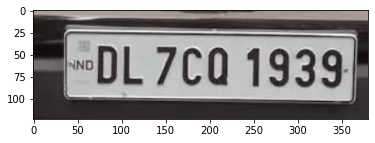

In [47]:
carPlateDirName = "./Car/CarPlate"
fileNames = os.listdir(carPlateDirName)
images = [ cv2.imread(os.path.join(carPlateDirName, i)) for i in fileNames ]
plt.imshow(images[0])
# images[0].show()

In [8]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [9]:
def remove_noise(image):
    return cv2.medianBlur(image, 5)

In [51]:
def thresholding(image):
    return cv2.threshold(image, 0, 255,  cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [11]:
def applyPreprocessing(image, preprocessors):
  for preprocessor in preprocessors:
    image = preprocessor(image)
  return image

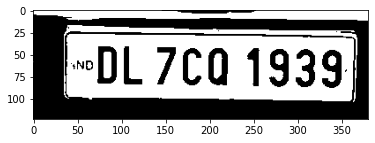

In [53]:
images = [ applyPreprocessing(image, [get_grayscale, thresholding]) for image in images ]
plt.imshow(images[0], cmap = "gray")

In [45]:
class ImageRecognizer:
    def __init__(self, image, *, psm=6, char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"):
        self.image = image
        self.config = f"--psm {psm} tessedit_char_whitelist = {char_whitelist}"
        self.processed = False

    def recognize(self):
        self.boxes = pt.image_to_boxes(
            self.image, config=self.config, output_type=Output.DICT)
        self.data = pt.image_to_data(
            self.image, config=self.config, output_type=Output.DICT)
        self.text = pt.image_to_string(self.image, config=self.config)
        self.processed = True

    def get_text(self):
        if not self.processed:
            return False
        return self.text

    def get_boxes(self):
        if not self.processed:
            return False
        return self.boxes

    def get_data(self):
        if not self.processed:
            return False
        return self.data

In [27]:
NUMERPLATE_PATTERN=regex.compile(
    r"(([A-Z]\s*){2}([0-9]\s*){1,2}([A-Z]\s*){2}([0-9]\s*){1,4}){s<2}")
def get_numberplate_matches(text):
  matches = NUMERPLATE_PATTERN.findall(text)
  return matches

In [54]:
# plt.imshow(images[0])
for image in images:  
  ir = ImageRecognizer(image)
  ir.recognize()
  text = ir.get_text()
  matches = get_numberplate_matches(text)
  if not matches:
    print("No matches were found for the provided image")
  else:
    print("Match: ", matches[0][0].strip())

Match:  DL7C0 1933
No matches were found for the provided image
Match:  II TN 63
Match:  MH20EJ 0365
Match:  JO3ER0563
Match:  CGO4MF2250
Match:  HH12DE1433
Match:  KL 52 P_3003
Match:  SGIAZ7873
Match:  DL 2C K8169
